# NLP - Sarcasm Detection
MLP Model + **Pre-trained** Embedding Layer

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras import layers
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 1- Load Data

In [2]:
!wget --no-check-certificate https://storage.googleapis.com/learning-datasets/sarcasm.json

--2023-10-29 18:27:08--  https://storage.googleapis.com/learning-datasets/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  --.-KB/s    in 0.1s    

2023-10-29 18:27:09 (52.7 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [3]:
df = pd.read_json('sarcasm.json')

In [4]:
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [5]:
df.shape

(26709, 3)

In [7]:
sentences = df['headline'].to_list()
labels = df['is_sarcastic'].to_list()

## 2- Pre-processing

In [ ]:
sw = stopwords.words('english')

In [ ]:
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
for s in sentences[:2]:
  print(s)

former versace store clerk sues over secret 'black code' for minority shoppers
the 'roseanne' revival catches up to our thorny political mood, for better and worse


In [ ]:
for i in range(len(sentences)):
  words = sentences[i].split()
  words_new = [w for w in words if w not in sw]
  sentences[i] = ' '.join(words_new)

In [ ]:
for s in sentences[:2]:
  print(s)

former versace store clerk sues secret 'black code' minority shoppers
'roseanne' revival catches thorny political mood, better worse


In [18]:
training_size = 23000

train_sentences = sentences[:training_size]
validation_sentences = sentences[training_size:]

train_labels = labels[:training_size]
validation_labels = labels[training_size:]

train_sentences = np.array(train_sentences)
validation_sentences = np.array(validation_sentences)
train_labels = np.array(train_labels)
validation_labels = np.array(validation_labels)

## 3- Model Design

In [13]:
hub_layer = hub.KerasLayer("https://www.kaggle.com/models/google/gnews-swivel/frameworks/TensorFlow2/variations/tf2-preview-20dim/versions/1", output_shape=[20],
                           input_shape=[], dtype=tf.string, trainable=False)

model2 = Sequential([
    hub_layer,
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 20)                400020    
                                                                 
 dense_4 (Dense)             (None, 16)                336       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 400373 (1.53 MB)
Trainable params: 353 (1.38 KB)
Non-trainable params: 400020 (1.53 MB)
_________________________________________________________________


## 4- Training

In [16]:
adam = keras.optimizers.Adam(learning_rate=0.0001)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [19]:
history2 = model2.fit(train_sentences, train_labels,
                      batch_size=128,
                      epochs=50,
                      validation_data=(validation_sentences, validation_labels))

Epoch 1/50
180/180 [==============================] - 2s 4ms/step - loss: 0.7228 - accuracy: 0.4968 - val_loss: 0.7048 - val_accuracy: 0.5152
Epoch 2/50
180/180 [==============================] - 1s 3ms/step - loss: 0.7032 - accuracy: 0.5233 - val_loss: 0.6895 - val_accuracy: 0.5454
Epoch 3/50
180/180 [==============================] - 1s 3ms/step - loss: 0.6894 - accuracy: 0.5482 - val_loss: 0.6785 - val_accuracy: 0.5605
Epoch 4/50
180/180 [==============================] - 1s 3ms/step - loss: 0.6791 - accuracy: 0.5690 - val_loss: 0.6704 - val_accuracy: 0.5772
Epoch 5/50
180/180 [==============================] - 1s 3ms/step - loss: 0.6714 - accuracy: 0.5854 - val_loss: 0.6641 - val_accuracy: 0.5915
Epoch 6/50
180/180 [==============================] - 1s 4ms/step - loss: 0.6654 - accuracy: 0.5956 - val_loss: 0.6593 - val_accuracy: 0.6023
Epoch 7/50
180/180 [==============================] - 1s 4ms/step - loss: 0.6607 - accuracy: 0.6062 - val_loss: 0.6556 - val_accuracy: 0.6120
Epoch 

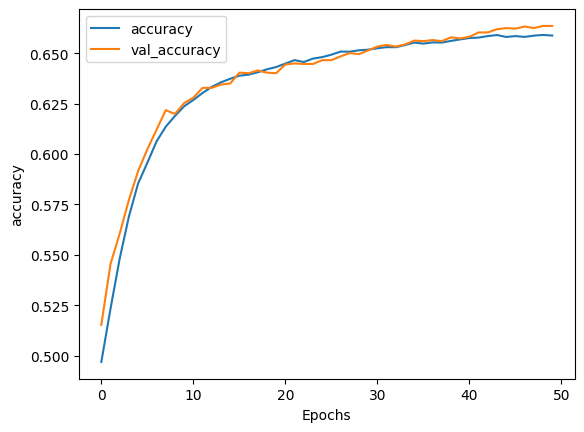

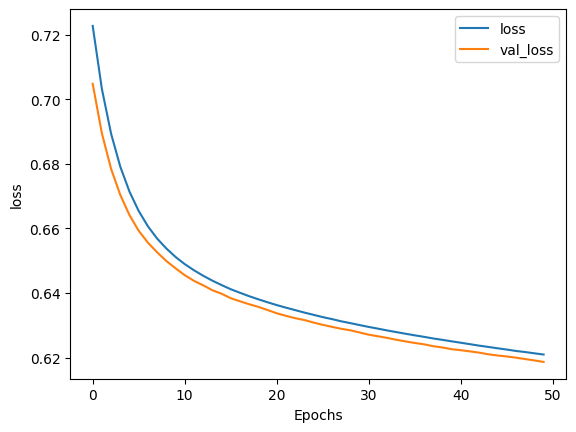

In [20]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history2, "accuracy")
plot_graphs(history2, "loss")

In [21]:
test_sentences = ["granny starting to fear spiders in the garden might be real",
                  "game of thrones season finale showing this sunday night",
                  "TensorFlow book will be a best seller"]
# Remove stop-words

In [22]:
preds = model2.predict(test_sentences)
print(preds)

1/1 [==============================] - 0s 191ms/step
[[0.5716044 ]
 [0.28514203]
 [0.40073356]]
